In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
#Load pollution analysis
#From Table 3- 15. use the following average constituent contributions:
bod_load_g_per_capita = 67  # g/person/day, range 50-120 g/person/day
tss_load_g_per_capita =  61 # g/person/day, range 60-150 g/person/day

Q_domesticpercapita=180 #L/PE/day taken from standards.\n",
bod_concentration=  round(bod_load_g_per_capita/Q_domesticpercapita*1000,2)# mg/L\n",
print('BOD average concentration: '+str(bod_concentration)+ 'g/m3')
tss_concentration= round(tss_load_g_per_capita/Q_domesticpercapita*1000,2)# mg/L\n",
print ('TSS averge concentration : '+str(tss_concentration)+ 'g/m3')

####Estimation of design flows and pollutant loads.

In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Estimation of design flows and pollutant loads.

group_number=10
PE_domestic=340000 #Equivalent population.
Q_domesticpercapita=180 #L/PE/day taken from standards.
PE_commercial=math.ceil(group_number**0.5*9000) #Equivalent population.
Q_commercialpercapita=280 #L/PE/day given in the briefing.
Q_infiltration=11657 #m3/day

#Current average flow rates
Q_currentavgdomestic=Q_domesticpercapita*PE_domestic/1000
Q_currentavgcommercial=Q_commercialpercapita*PE_commercial/1000
Q_currentavginfiltration=Q_infiltration

#Current minimum flow rates
peak_minimum_factor=0.3 #Taken from the graph given in the briefing
Q_minimumdomestic=Q_currentavgdomestic*peak_minimum_factor
Q_minimumcomercial=Q_currentavgcommercial*peak_minimum_factor
Q_minimuminfiltration=Q_currentavginfiltration

#Current maximum flow rates
peak_maximum_factor=1.9 #Taken from the graph given in the briefing
Q_maximumdomestic=Q_currentavgdomestic*peak_maximum_factor
Q_maximumcomercial=Q_currentavgcommercial*peak_maximum_factor
Q_maximuminfiltration=Q_currentavginfiltration

#Equivalent population projection
growth_percentage=1+group_number*0.015
Life_time=20 #Life time decided to our WWTP. Provisional

PE_projected_domestic=math.ceil(PE_domestic*(1+growth_percentage/100)**Life_time)
PE_projected_comercial=math.ceil(PE_commercial*(1+growth_percentage/100)**Life_time)

climate_chage_factor=1.2 #Taken from a projection studies.

#Projected average flow rates (m3/day)
Q_projected_domestic=Q_domesticpercapita*PE_projected_domestic/1000
Q_projected_comercial=Q_commercialpercapita*PE_projected_comercial/1000
Q_projected_infiltration=Q_currentavginfiltration*climate_chage_factor

#Projected minimum flow rates (m3/day)

Q_projected_minimum_domestic=Q_projected_domestic*peak_minimum_factor
Q_projected_minimum_commercial=Q_projected_comercial*peak_minimum_factor
Q_projected_minimuminfiltration=Q_minimuminfiltration*climate_chage_factor

#Projected maximum flow rates (m3/day)
Q_projected_maximum_domestic=Q_projected_domestic*peak_maximum_factor
Q_projected_maximum_commercial=Q_projected_comercial*peak_maximum_factor
Q_projected_maximuminfiltration=Q_maximuminfiltration*climate_chage_factor

#Total Projected flow rates (m3/day)
Q_total_projected_maximum=Q_projected_maximum_domestic+Q_projected_maximum_commercial+Q_projected_maximuminfiltration
Q_total_projected_minimum=Q_projected_minimum_domestic+Q_projected_minimum_commercial+Q_projected_minimuminfiltration
Q_total_projected_average=Q_projected_domestic+Q_projected_comercial+Q_projected_infiltration

#Total current flow rates (m3/day)
Q_total_current_maximum=Q_maximumdomestic+Q_maximumcomercial+Q_maximuminfiltration
Q_total_current_minimum=Q_minimumdomestic+Q_minimumcomercial+Q_minimuminfiltration
Q_total_current_average=Q_currentavgdomestic+Q_currentavgcommercial+Q_currentavginfiltration

print (PE_projected_domestic)
print (PE_projected_comercial)

data_current = {
    'Contribution type': ['Domestic', 'Commercial', 'Infiltration', 'Total'],
    'Population':[PE_domestic,PE_commercial,'--','--'],
    'Minimum flow rate (m3/day)': [Q_minimumdomestic, Q_minimumcomercial, Q_minimuminfiltration, Q_total_current_minimum],
    'Average flow rate (m3/day)': [Q_currentavgdomestic, Q_currentavgcommercial, Q_currentavginfiltration, Q_total_current_average],
    'Maximum flow rate (m3/day)': [Q_maximumdomestic, Q_maximumcomercial, Q_maximuminfiltration, Q_total_current_maximum],
}

df1 = pd.DataFrame(data_current)
display(df1)

data_projected = {
    'Contribution type': ['Domestic ', 'Commercial', 'Infiltration','Total'],
    'Population':[PE_projected_domestic,PE_projected_comercial,'--','--'],
    'Minimum flow rate (m3/day)': [Q_projected_minimum_domestic, Q_projected_minimum_commercial, Q_projected_minimuminfiltration, Q_total_projected_minimum],
    'Average flow rate (m3/day)': [Q_projected_domestic,Q_projected_comercial, Q_projected_infiltration,Q_total_projected_average],
    'Maximum flow rate (m3/day)': [Q_projected_minimum_domestic, Q_projected_minimum_commercial, Q_projected_minimuminfiltration, Q_total_projected_maximum],
}
df2 = pd.DataFrame(data_projected)
display(df2)

427363
35775


,Contribution type,Population,Minimum flow rate (m3/day),Average flow rate (m3/day),Maximum flow rate (m3/day)
0,Domestic,340000,18360.000,61200.00,116280.000
1,Commercial,28461,2390.724,7969.08,15141.252
2,Infiltration,--,11657.000,11657.00,11657.000
3,Total,--,32407.724,80826.08,143078.252


,Contribution type,Population,Minimum flow rate (m3/day),Average flow rate (m3/day),Maximum flow rate (m3/day)
0,Domestic,427363,23077.602,76925.34,23077.602
1,Commercial,35775,3005.100,10017.00,3005.100
2,Infiltration,--,13988.400,13988.40,13988.400
3,Total,--,40071.102,100930.74,179178.846


**Export Variables to .pkl file**<br>
Variables run above this text.

In [5]:
import inspect

# Extract Variables from Notebook
def extract_variables():
    """
    Extract all variables from the current notebook's global scope.
    Returns:
        dict: A dictionary containing variable names and their values.
    """
    # Use globals() to extract all variables
    variables = {key: value for key, value in globals().items() if not key.startswith("__") and not inspect.ismodule(value)}
    return variables

# Extract variables
variables_dict = extract_variables()

# Store Variables in a Dictionary
# The variables are already organized in the `variables_dict` dictionary.
print(f"Extracted {len(variables_dict)} variables.")

Extracted 60 variables.


In [9]:
import pickle

# Filter out non-serializable objects from variables_dict
serializable_variables = {
    key: value for key, value in variables_dict.items()
    if isinstance(value, (int, float, str, list, dict, tuple, bool, type(None), pd.DataFrame))
}

# Save Variables to a File
# Save as a pickle file
with open("variables.pkl", "wb") as pickle_file:
    pickle.dump(serializable_variables, pickle_file)

print("Variables have been successfully saved to 'variables.pkl'.")

Variables have been successfully saved to 'variables.pkl'.


####Check with practice - screen design

In [5]:
#Preliminary treatment design:

#Velocity should be between 0.3 and 1 m/s
#Screen Width is recommended between 0.6 and 1.1 m

velocity_screen=0.7 #m/s, this value the first approximation.
cd=0.84 #dimensionless, this is a value of discharge coefficient for the screen
gravity=9.81 #m/s^2
width_between_bars=0.009 #m, given that it need to trap gross pollutans >10 mm
bar_with=0.004 #m, depends on commercial availability.


velocity_upstream_screen=velocity_screen*width_between_bars/(width_between_bars+bar_with) #m/s
print (velocity_upstream_screen)

head_loss_screen=1/(2*gravity*cd**2)*(velocity_screen**2-velocity_upstream_screen**2)
print (head_loss_screen)

#Design of the screen channel

flow_depth_downstream=0.4 #m during desing peak flow.

flow_depth_upstream=flow_depth_downstream+head_loss_screen

print (flow_depth_upstream)

wet_area=(22291/86400)/velocity_upstream_screen #Flow converted into m^3/s, area in m^2
print (wet_area)

width_channel_screen = (wet_area / flow_depth_upstream)

# Round up to the nearest multiple of 0.05
width_channel_screen_rounded = math.ceil(width_channel_screen / 0.1) * 0.1 #m

print (width_channel_screen_rounded)

if (width_channel_screen_rounded>1.1):
  screen_number=math.ceil(width_channel_screen_rounded/1.1)
  if not 0.3<screen_number<1.1:
    screen_number=math.ceil(screen_number)
  else:
    print('it is too narrow')

print (screen_number)

#It need to comply with the minimum velocity with the average current flow. In this case, we want to find the
#downstream height controlled by a hydraulic structure since this is not provided in the briefing.


velocity_upstream_screen_current_average=0.42 #m/s desired velocity

flow_depth_downstream_current_average=(12444/86400)/(velocity_upstream_screen_current_average*width_channel_screen_rounded)-head_loss_screen #m, it

print (flow_depth_downstream_current_average)

#### Design of screens - Preliminary treatment

5.4.3 https://www.youtube.com/watch?v=2WwA7Mdrm8k

In [6]:
#Preliminary treatment design:

#Velocity should be between 0.3 and 1 m/s
#Screen Width is recommended between 0.6 and 1.1 m

velocity_screen=1 #m/s, this value the first approximation
cd=0.84 #dimensionless, this is a value of discharge coefficient for the screen
gravity=9.81 #m/s^2
width_between_bars=0.01 #m, given that it need to trap gross pollutans >10 mm
bar_with=0.004 #m, depends on commercial availability.


velocity_upstream_screen=velocity_screen*width_between_bars/(width_between_bars+bar_with) #m/s
print ('The velocity upstream the screen is: '+str(velocity_upstream_screen))

head_loss_screen=round(1/(2*gravity*cd**2)*(velocity_screen**2-velocity_upstream_screen**2),2)
print ('the head loss screen is: '+str(head_loss_screen))

#Design of the screen channel

flow_depth_downstream=0.7 #m during desing peak flow.

flow_depth_upstream=flow_depth_downstream+head_loss_screen

print ('the flow depth upstream is: '+str(flow_depth_upstream))

wet_area=(Q_total_projected_maximum/86400)/velocity_upstream_screen #Flow converted into m^3/s, area in m^2
print ('The weat area  is: '+str(wet_area))

width_channel_screen = (wet_area / flow_depth_upstream)

# Round up to the nearest multiple of 0.1
width_channel_screen_rounded = math.ceil(width_channel_screen / 0.1) * 0.1 #m

print ('The suitable width channel is: '+str(width_channel_screen_rounded)+' m')

if (width_channel_screen_rounded>1.1):
  screen_number=math.ceil(width_channel_screen_rounded/1.1)
  if not 0.3<screen_number<1.1:
    screen_number=math.ceil(screen_number)
  else:
    print('it is too narrow')

print ('The number of screen should be: '+str(screen_number))

#It need to comply with the minimum velocity with the minimum current flow. In this case, we want to find the
#downstream depth flow controlled by a hydraulic structure since this is not provided in the briefing.


velocity_upstream_screen_current_average=0.4 #m/s desired velocity

flow_depth_downstream_current_average=(Q_total_current_average/86400)/(velocity_upstream_screen_current_average*width_channel_screen_rounded)-head_loss_screen #m, it

print ('The depth flow controlled by a hydraulic structure should be less than '+str(flow_depth_downstream_current_average)+' m in order to comply with the minimum velocity with the average current flow.')





#### Equalization basin

9.7.6. Equalization Sustainability and Resource Recovery
Equalization operations have little resource recovery potential. However, they could provide significant sustainable features to a WRRF, as peak demand loadings and their associated larger energy requirements can be avoided when equalization is practiced.

Botero, Lucas, Joel C. Rife, Kendra D. Sveum, and Alex Szerwinski. 2018. “Equalization.” Chap. 9.7 in Design of Water Resource Recovery Facilities. 6th ed., edited by The Water Environment Federation (WEF). McGraw-Hill Education: New York, Chicago, San Francisco, Athens, London, Madrid, Mexico City, Milan, New Delhi, Singapore, Sydney, Toronto. https://www.accessengineeringlibrary.com/content/book/9781260031188/toc-chapter/chapter9/section/section101

,Time of Day,Qavg (m³/hr),Flow distribution Q (m³/hr),Difference (Flow-Qavg) (m³/hr),Amount to Storage (m³),Amount from Storage (m³),Running Total in Storage (m³)
0,0 to 1,4205.447500,2523.268500,-1682.179000,0.000000,1682.179000,0.000000
1,1 to 2,4205.447500,2102.723750,-2102.723750,0.000000,2102.723750,0.000000
2,2 to 3,4205.447500,1682.179000,-2523.268500,0.000000,2523.268500,0.000000
3,3 to 4,4205.447500,1261.634250,-2943.813250,0.000000,2943.813250,0.000000
4,4 to 5,4205.447500,1261.634250,-2943.813250,0.000000,2943.813250,0.000000
5,5 to 6,4205.447500,1682.179000,-2523.268500,0.000000,2523.268500,0.000000
6,6 to 7,4205.447500,2523.268500,-1682.179000,0.000000,1682.179000,0.000000
7,7 to 8,4205.447500,2943.813250,-1261.634250,0.000000,1261.634250,0.000000
8,8 to 9,4205.447500,3364.358000,-841.089500,0.000000,841.089500,0.000000
9,9 to 10,4205.447500,3784.902750,-420.544750,0.000000,420.544750,0.000000


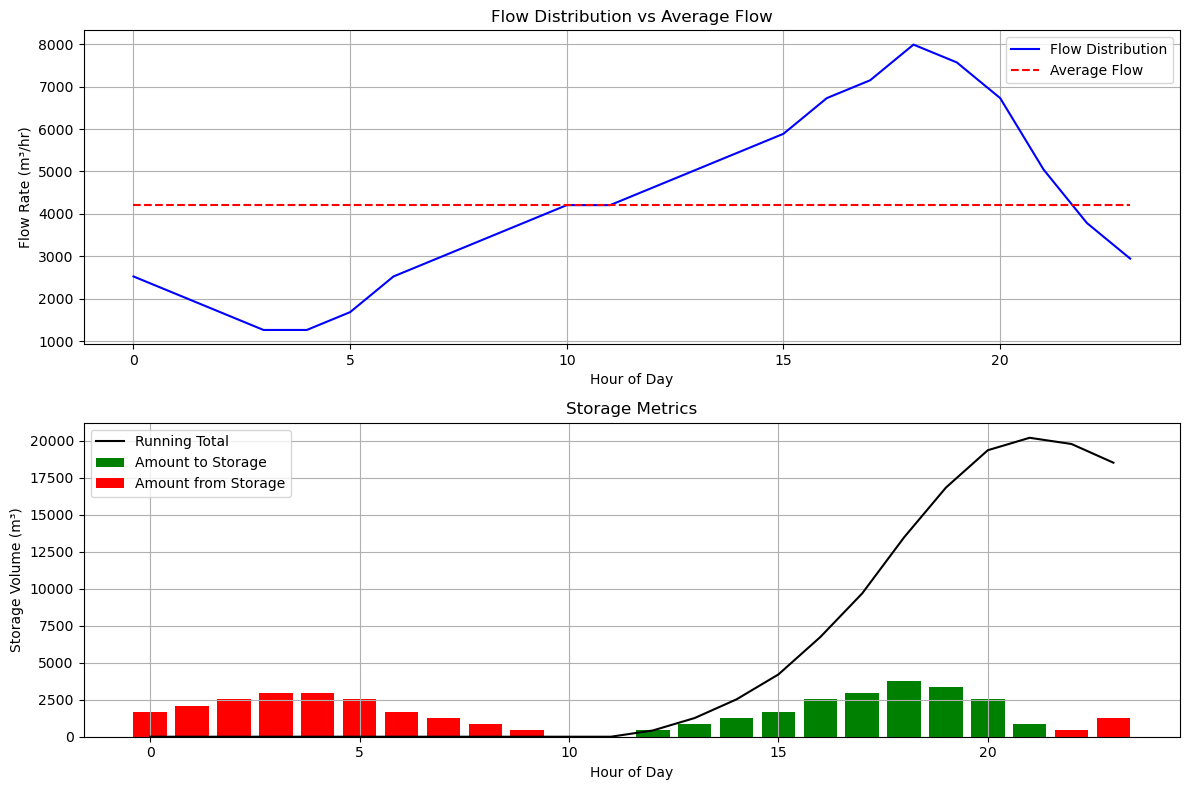

24000.0


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Create data for the table
data = {
    'Time of Day': [f"{i} to {i+1}" for i in range(0, 24)],
    'Qavg (m³/hr)': [Q_total_projected_average/24] * 24,  # Constant average flow
}

# Flow distribution that follows a pattern (low at night, high during day)
# This values are taken from Daily fluctuation of peaking factors graph given in the briefing.
flow_coefficients = [
    0.6, 0.5, 0.4, 0.3, 0.3, 0.4, 0.6, 0.7,
    0.8, 0.9, 1, 1, 1.1, 1.2, 1.3, 1.4,
    1.6, 1.7, 1.9, 1.8, 1.6, 1.2, 0.9, 0.7
]
# Calculate actual flow values by multiplying coefficients by the average
flow_values = [coef * Q_total_projected_average/24 for coef in flow_coefficients]
data['Flow distribution Q (m³/hr)'] = flow_values[:24]

# Calculate the difference
data['Difference (Flow-Qavg) (m³/hr)'] = [q - data['Qavg (m³/hr)'][0] for q in data['Flow distribution Q (m³/hr)']]

# Initialize storage calculations
data['Amount to Storage (m³)'] = [0] * 24
data['Amount from Storage (m³)'] = [0] * 24
data['Running Total in Storage (m³)'] = [0] * 24

# Calculate storage values
running_total = 0
for i in range(24):
    diff = data['Difference (Flow-Qavg) (m³/hr)'][i]

    # If flow > avg, we add to storage
    if diff > 0:
        data['Amount to Storage (m³)'][i] = diff
        data['Amount from Storage (m³)'][i] = 0
        running_total += diff
    # If flow < avg, we take from storage
    else:
      if running_total == 0:
        data['Amount to Storage (m³)'][i] = 0
        data['Amount from Storage (m³)'][i] = abs(diff)
        running_total += 0
      else:
        data['Amount to Storage (m³)'][i] = 0
        data['Amount from Storage (m³)'][i] = abs(diff)
        running_total -= abs(diff)

    data['Running Total in Storage (m³)'][i] = running_total

# Create DataFrame
df = pd.DataFrame(data)

# Format the DataFrame for better display
# Format time of day column
df['Time of Day'] = [f"{i:2d} to {i+1:2d}" for i in range(0, 24)]

# Apply formatting to numeric columns to match the table
pd.options.display.float_format = '{:.0f}'.format

# Create styled table
styled_df = df.style.set_table_styles([
    {'selector': 'th', 'props': [('color', 'black'),
                               ('font-weight', 'bold'),
                               ('border', '1px solid #ddd'),
                               ('padding', '5px')]},
    {'selector': 'td', 'props': [('border', '1px solid #ddd'),
                               ('padding', '5px')]},
    {'selector': '', 'props': [('border-collapse', 'collapse'),
                             ('width', '100%'),
                             ('font-size', '14px')]}
])

# Group headers
header_style = {
    'selector': 'th.col_heading',
    'props': [('background-color', '#0a6e3c'),
              ('color', 'white'),
              ('text-align', 'center'),
              ('font-weight', 'bold'),
              ('border', '1px solid black'),
              ('padding', '5px')]
}

# Display the styled table
display(styled_df)

# If you want to save to Excel
df.to_excel("water_flow_table.xlsx", index=False)

# Create a visualization of the data
plt.figure(figsize=(12, 8))

# Plot flow distribution vs average flow
plt.subplot(2, 1, 1)
plt.plot(range(24), df['Flow distribution Q (m³/hr)'], 'b-', label='Flow Distribution')
plt.plot(range(24), df['Qavg (m³/hr)'], 'r--', label='Average Flow')
plt.xlabel('Hour of Day')
plt.ylabel('Flow Rate (m³/hr)')
plt.title('Flow Distribution vs Average Flow')
plt.grid(True)
plt.legend()

# Plot storage metrics
plt.subplot(2, 1, 2)
plt.bar(range(24), df['Amount to Storage (m³)'], color='green', label='Amount to Storage')
plt.bar(range(24), df['Amount from Storage (m³)'], color='red', label='Amount from Storage')
plt.plot(range(24), df['Running Total in Storage (m³)'], 'k-', label='Running Total')
plt.xlabel('Hour of Day')
plt.ylabel('Storage Volume (m³)')
plt.title('Storage Metrics')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#Include adquate safety factors

safety_factor=1.2 #We meed to justify this.
required_volume_equalizer=safety_factor*max(df['Running Total in Storage (m³)'])
rounded_required_volume_equalizer=round(required_volume_equalizer,-3) #m3
print (rounded_required_volume_equalizer)


### Secondary Treatment

First Iteration - Using Conventional process

In [44]:
#First, we will calculate the influent BOD5 concentration from the primary clarifier kwnowing that the BOD5 removal efficiency is 
#90% and the effluent BOD5 concentration is 20 mg/L. This is the maximum value that we can have in the effluent and the maximim
# efficiency that we can have in the secondary clarifier.

BOD_removal_efficiency=0.92 #dimensionless, this is the maximum value that we can have in the secondary clarifier regardless the process.
print (BOD_removal_efficiency)
BOD_required_to_effluent=20 #mg/L

BOD_primary_clarifier=round(BOD_required_to_effluent/(1-BOD_removal_efficiency),2) #mg/L
print ('BOD primary clarifier is: ' +str(BOD_primary_clarifier)+ ' mg/L')

Q1=Q_total_current_average #m3/d, This is the flow from the equalization tank upstream.

#MLSS value is taken since we have a 10 degree water temperature and it is the maximum value that we can have
#in the secondary clarifier according to Table 8-19 Metcalf & Eddy.

mixed_liquor_suspended_solids=3000 #mg/L(X), this shoould be betweeen 1000-3000 mg/L for a conventional activated sludge process.

#Typical values of the yield coefficient and decay coefficient. This need to be justified.
yield_coefficient=0.45 #SS/mg BOD5 (Y)
decay_coefficient=0.04 #/day (Kd)
conversion_rate_constant=0.2 #/day (k)

#We want the SVI less than 120 mL/g, this is recommended to have a good settling sludge. Therefore, using 110 mL/g value  
# we can calculate the return sludge concentration.

suspended_volumen_index=110 #mL/g
print ('SVI is: '+str(suspended_volumen_index)+' mL/g')

#Therefore, the return sludge concentration is:

return_sludge_suspended_solids=10**6/suspended_volumen_index #mg/L(XR),
print ('The return sludge concentration is: '+str(return_sludge_suspended_solids)+' mg/L')

#Using this SVI value, and havind selected the MLSS value, we can calculate the volumen settled sludge.
volumen_settled_sludge=suspended_volumen_index*mixed_liquor_suspended_solids/1000 #v
print ('The volumen settled is: '+str(volumen_settled_sludge)+' mL/L')

#Knowing the volumen settled sludge, we can calculate the return sludge flow.
return_sluge_flow=(Q1*volumen_settled_sludge)/(1000-volumen_settled_sludge) #m3/d
print ('The return sludge is: '+str(return_sluge_flow)+' m3/d')

#Using the return sludge flow, we can calculate the return sludge ratio
return_sludge_ratio=return_sluge_flow/Q1 # this should be between 0.25-0.75 for a conventional activated sludge process.
print ('The return sludge ratio is: '+str(return_sludge_ratio))

food_to_microorganism_ratio=0.4 #This value depends on the process, for this case it is a conventional process.
#We select the minimum Try to minimize the volumen. it could be 0.2-0.4 for a conventional activated sludge process according to the table 8-19 Metcalf & Eddy.

#The aeration volume is calculated using the BOD5 concentration from the primary clarifier, the flow rate, the food to microorganism ratio, and the mixed liquor suspended solids concentration.
aereation_volumen=(BOD_primary_clarifier*Q1)/(food_to_microorganism_ratio*mixed_liquor_suspended_solids)
print ('aereation volumen is: ' +str(aereation_volumen)+ ' m3')

#The aeration time is calculated using the aeration volume and the flow rate.
aereation_time=(aereation_volumen/Q1)*24 #hours. This value should be between 4-8 hours for a conventional activated sludge process.
print ('aereation time is: ' +str(aereation_time) + ' hours')

BOD_load=(BOD_primary_clarifier*Q1)/aereation_volumen #g/m3/day
print ('BOD load is: ' +str(BOD_load))

specific_utilisation_ratio=(food_to_microorganism_ratio*BOD_removal_efficiency) #dimensionless
print ('specific utilisation ratio is: ' +str(specific_utilisation_ratio))

sludge_age=1/(yield_coefficient*specific_utilisation_ratio-decay_coefficient) #days. This value should be between 5-15 days for a conventional activated sludge process.
print('sludge age is: ' +str(sludge_age)+ ' days')

safety_factor_peak_org_loading=1.3 #This try to account the variation of BOD regardless the flow.

sludge_age_increased=sludge_age*safety_factor_peak_org_loading
print('sludge age increased is: ' +str(sludge_age_increased))



0.9
BOD primary clarifier is: 200.00000000000006 mg/L
SVI is: 90.9090909090909 mL/g
The volumen settled is: 272.7272727272727 mL/L
The return sludge is: 30309.779999999995
The return sludge ratio is: 37.49999999999999
aereation volumen is: 13471.013333333338
aereation time is: 4.000000000000001
BOD load is: 1200.0


Second Iteration - Using CMAS

In [ ]:
#First, we will calculate the influent BOD5 concentration from the primary clarifier kwnowing that the BOD5 removal efficiency is 
#90% and the effluent BOD5 concentration is 20 mg/L. This is the maximum value that we can have in the effluent and the maximim
# efficiency that we can have in the secondary clarifier.

BOD_removal_efficiency=0.90 #dimensionless, this is the maximum value that we can have in the secondary clarifier regardless the process.
print (BOD_removal_efficiency)
BOD_required_to_effluent=20 #mg/L

BOD_primary_clarifier=round(BOD_required_to_effluent/(1-BOD_removal_efficiency),2) #mg/L
print ('BOD primary clarifier is: ' +str(BOD_primary_clarifier)+ ' mg/L')

Q1=Q_total_current_average #m3/d, This is the flow from the equalization tank upstream.

#MLSS value is taken since we have a 10 degree water temperature and it is the maximum value that we can have
#in the secondary clarifier according to Table 8-19 Metcalf & Eddy.

mixed_liquor_suspended_solids=4000 #mg/L(X), this shoould be betweeen 2500-4000 mg/L for a CMAS activated sludge process.

#Typical values of the yield coefficient and decay coefficient. Given that we have a 10 degree water temperature
#the values are modified using the Arrhenius equation.
yield_coefficient=0.45 #SS/mg BOD5 (Y)
decay_coefficient=0.04 #/day (Kd)
conversion_rate_constant=0.2 #/day (k)

#We want the SVI less than 120 mL/g, this is recommended to have a good settling sludge. Therefore, using 110 mL/g value 
# we can calculate the return sludge concentration.

suspended_volumen_index=110 #mL/g
print ('SVI is: '+str(suspended_volumen_index)+' mL/g')

#Therefore, the return sludge concentration is:

return_sludge_suspended_solids=10**6/suspended_volumen_index #mg/L(XR),
print ('The return sludge concentration is: '+str(return_sludge_suspended_solids)+' mg/L')

#Using this SVI value, and havind selected the MLSS value, we can calculate the volumen settled sludge.
volumen_settled_sludge=suspended_volumen_index*mixed_liquor_suspended_solids/1000 #v
print ('The volumen settled is: '+str(volumen_settled_sludge)+' mL/L')

#Knowing the volumen settled sludge, we can calculate the return sludge flow.
return_sluge_flow=(Q1*volumen_settled_sludge)/(1000-volumen_settled_sludge) #m3/d
print ('The return sludge is: '+str(return_sluge_flow)+' m3/d')

#Using the return sludge flow, we can calculate the return sludge ratio
return_sludge_ratio=return_sluge_flow/Q1 # this should be between 0.25-0.75 for a conventional activated sludge process.
print ('The return sludge ratio is: '+str(return_sludge_ratio))

food_to_microorganism_ratio=0.4 #This value depends on the process, for this case it is a conventional process.
#We select the minimum Try to minimize the volumen. it could be 0.2-0.4 for a conventional activated sludge process according to the table 8-19 Metcalf & Eddy.

#The aeration volume is calculated using the BOD5 concentration from the primary clarifier, the flow rate, the food to microorganism ratio, and the mixed liquor suspended solids concentration.
aereation_volumen=(BOD_primary_clarifier*Q1)/(food_to_microorganism_ratio*mixed_liquor_suspended_solids)
print ('aereation volumen is: ' +str(aereation_volumen)+ ' m3')

#The aeration time is calculated using the aeration volume and the flow rate.
aereation_time=(aereation_volumen/Q1)*24 #hours. This value should be between 3-6 hours for a CMAS activated sludge process.
print ('aereation time is: ' +str(aereation_time) + ' hours')

BOD_load=(BOD_primary_clarifier*Q1)/aereation_volumen #g/m3/day
print ('BOD load is: ' +str(BOD_load))

specific_utilisation_ratio=(food_to_microorganism_ratio*BOD_removal_efficiency) #dimensionless
print ('specific utilisation ratio is: ' +str(specific_utilisation_ratio))

sludge_age=1/(yield_coefficient*specific_utilisation_ratio-decay_coefficient) #days. This value should be between 5-15 days for a conventional activated sludge process.
print('sludge age is: ' +str(sludge_age)+ ' days')

safety_factor_peak_org_loading=1.3 #This try to account the variation of BOD regardless the flow.

sludge_age_increased=sludge_age*safety_factor_peak_org_loading
print('sludge age increased is: ' +str(sludge_age_increased))



0.9
BOD primary clarifier is: 200.00000000000006 mg/L
SVI is: 90.9090909090909 mL/g
The volumen settled is: 272.7272727272727 mL/L
The return sludge is: 30309.779999999995
The return sludge ratio is: 37.49999999999999
aereation volumen is: 13471.013333333338
aereation time is: 4.000000000000001
BOD load is: 1200.0
specific utilisation ratio is: 0.0036000000000000003
sludge age is: -17.28907330567082
sludge age increased is: -22.475795297372066
contact tank is: 2694.2026666666675
stabilization volumen tank is: 10776.81066666667
contact tank deth is: 5
contact tank length is: 20
contact tank width: 26.942026666666674
Stabilization tank length is: 65
Stabilization tank width: 24
Stabilization tank depth: 6.908211965811968


Secondary treatment - Check with practice

Environmental Impact Assessment:

In [38]:
#Initial information Environmental impact assessment.

#Flow receiving waterway according to the group number given in the briefing.
flow_receiving_waterway=round((group_number**0.2*300000),3) #m3/day, this is a value taken from the briefing.
print('Flow receiving waterway: ' +str(flow_receiving_waterway)+ ' m3/day')
Q_new_peak=Q_total_projected_average #m3/day, this is a test value.
print('Flow receiving waterway: '+str(Q_new_peak))

#BOD5 receiving waterway directly uptream from discharge point (Lr).
bod_upstream_receiving_waterway= 4 #mg/L, this is a value taken from the briefing.

saturation_dissolved_oxygen=8.5 #mg/L, this is a value taken from the briefing.

#Initial disolve oxygen deficit in the receiving waterway (D0).
initial_disolved_oxygen_deficit=0.8 #mg/L, this is a value taken from the briefing.

#Reareation rate constant base e (kr).
reaeration_rate_constant=0.71 #1/day, this is a value taken from the briefing.

#desoxygenation rate constant base e (kd).
desoxygenation_rate_constant=0.51 #1/day, this is a value taken from the briefing.

#stream velocity 
stream_velocity=0.07 #m/s, this is a value taken from the briefing.

#disolved oxygen needs to be greater than 70% of saturation. According to ENVIRONMENT REFERENCE STANDARD for Victoria.
#This is for a surface waterway located in the north west of Melbourne.
minimum_dissolved_oxygen=round(0.7*saturation_dissolved_oxygen,2) #mg/L.

print('Minimum dissolved oxygen: ' +str(minimum_dissolved_oxygen)+' mg/L')

maximum_dissolved_oxygend_deficit=saturation_dissolved_oxygen-minimum_dissolved_oxygen #mg/L,
print('Maximum dissolved oxygen deficit: ' +str(maximum_dissolved_oxygend_deficit)+' mg/L')

max_bod_5_effluent=20 #mg/L, this is a value taken from EPA guidelines (Lw).

first_reaction_order_constant=0.23 #1/day, this is a value taken book reference Mcalf eddy pag 118-119.

bod_ultimate_effluent=round((max_bod_5_effluent/(1-math.exp(-first_reaction_order_constant*5))),2) #mg/L, this is a value taken from the briefing.
print('BOD ultimate effluent: ' +str(bod_ultimate_effluent)+' mg/L')

#This is the equation for the BOD ultimate mixing zone (Lo)
bod_ultimate_mixing_zone=round((flow_receiving_waterway*bod_upstream_receiving_waterway+Q_new_peak*bod_ultimate_effluent)/(flow_receiving_waterway+Q_total_projected_maximum),2) #mg/L. Q TOTAL PROJECTED AVERAGE needs to be checked due to new peak flow.
print('BOD ultimate mixing zone: ' +str(bod_ultimate_mixing_zone)+' mg/L')

#time at which DO will reach minimum level (tc).

time_minimum_dissolved_oxygen=1/(reaeration_rate_constant-desoxygenation_rate_constant)*math.log(reaeration_rate_constant/desoxygenation_rate_constant*(1-initial_disolved_oxygen_deficit*((reaeration_rate_constant-desoxygenation_rate_constant)/(desoxygenation_rate_constant*bod_ultimate_mixing_zone)))) #days.

print('Time at which DO will reach minimum level: ' +str(time_minimum_dissolved_oxygen)+' days')

#In order to calculate the length of the minimium DO level, we use (tc) and the stream velocity (v).

lenght_minimum_DO_level=round(time_minimum_dissolved_oxygen*86400*stream_velocity,2) #m, this is a value taken from the briefing.
print('Length of the minimum DO level: ' +str(lenght_minimum_DO_level)+' m')

#Dissolve oxigen  at the time of minimum level (DOt).
dissolved_oxygen_deficit_at_time_minimum_level=((desoxygenation_rate_constant*bod_ultimate_mixing_zone)/(reaeration_rate_constant-desoxygenation_rate_constant))*(math.exp(-desoxygenation_rate_constant*time_minimum_dissolved_oxygen)-math.exp(-reaeration_rate_constant*time_minimum_dissolved_oxygen))+(initial_disolved_oxygen_deficit*math.exp(-reaeration_rate_constant*time_minimum_dissolved_oxygen))#mg/L.
print('Dissolved oxygen deficit at the time of minimum level: ' +str(dissolved_oxygen_deficit_at_time_minimum_level)+' mg/L')

if dissolved_oxygen_deficit_at_time_minimum_level>maximum_dissolved_oxygend_deficit:
  print('The dissolved oxygen deficit at the time of minimum level is greater than the maximum dissolved oxygen deficit.')
else:
    print('The dissolved oxygen deficit at the time of minimum level is less than the maximum dissolved oxygen deficit therefore it is suitable.')

#This calculation find the length where the dissolved oxygen is the same as the saturation dissolved oxygen.



Flow receiving waterway: 475467.958 m3/day
Flow receiving waterway: 90000
Minimum dissolved oxygen: 5.95 mg/L
Maximum dissolved oxygen deficit: 2.55 mg/L
BOD ultimate effluent: 29.27 mg/L
BOD ultimate mixing zone: 6.93 mg/L
Time at which DO will reach minimum level: 1.4226343989206913 days
Length of the minimum DO level: 8604.09 m
Dissolved oxygen deficit at the time of minimum level: 2.409603052511724 mg/L
The dissolved oxygen deficit at the time of minimum level is less than the maximum dissolved oxygen deficit therefore it is suitable.


In [11]:
%store

In [40]:
BOD_removal_efficiency=0.9 #dimensionless, this is the maximum value that we can have in the secondary clarifier regardless the process.
print (BOD_removal_efficiency)
BOD_required_to_effluent=20 #mg/L

0.9
